## Task

TO build phylogenetc tree for 6 spicies (human, mouse, dog, chicken, cat and whale), using mitochondrial DNA.

In [2]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 7.8 MB/s eta 0:00:00


In [3]:
import Bio
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo
import os
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [16]:
!mkdir '/content/drive/MyDrive/Colab Notebooks/mrna'
#human
!wget 'https://www.ncbi.nlm.nih.gov/kis/download/sequence/?db=nucleotide&id=NC_012920.1' -O '/content/drive/MyDrive/Colab Notebooks/mrna/NC_012920.1.fasta'
#dog
!wget 'https://www.ncbi.nlm.nih.gov/kis/download/sequence/?db=nucleotide&id=NC_002008.4' -O '/content/drive/MyDrive/Colab Notebooks/mrna/NC_002008.4.fasta'
#chicken
!wget 'https://www.ncbi.nlm.nih.gov/kis/download/sequence/?db=nucleotide&id=NC_053523.1' -O '/content/drive/MyDrive/Colab Notebooks/mrna/NC_053523.1.fasta'
#mouse
!wget 'https://www.ncbi.nlm.nih.gov/kis/download/sequence/?db=nucleotide&id=NC_005089.1' -O '/content/drive/MyDrive/Colab Notebooks/mrna/NC_005089.1.fasta'
#cat
!wget 'https://www.ncbi.nlm.nih.gov/kis/download/sequence/?db=nucleotide&id=NC_001700.1' -O '/content/drive/MyDrive/Colab Notebooks/mrna/NC_001700.1.fasta'
#whale
!wget 'https://www.ncbi.nlm.nih.gov/kis/download/sequence/?db=nucleotide&id=NC_005268.1' -O '/content/drive/MyDrive/Colab Notebooks/mrna/NC_005268.1.fasta'

mkdir: cannot create directory ‘/content/drive/MyDrive/Colab Notebooks/mrna’: File exists
--2023-10-01 08:26:16--  https://www.ncbi.nlm.nih.gov/kis/download/sequence/?db=nucleotide&id=NC_012920.1
Resolving www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)... 130.14.29.110, 2607:f220:41e:4290::110
Connecting to www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)|130.14.29.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘/content/drive/MyDrive/Colab Notebooks/mrna/NC_012920.1.fasta’

/content/drive/MyDr     [ <=>                ]  16.70K  --.-KB/s    in 0.01s   

2023-10-01 08:26:17 (1.19 MB/s) - ‘/content/drive/MyDrive/Colab Notebooks/mrna/NC_012920.1.fasta’ saved [17103]

--2023-10-01 08:26:17--  https://www.ncbi.nlm.nih.gov/kis/download/sequence/?db=nucleotide&id=NC_002008.4
Resolving www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)... 130.14.29.110, 2607:f220:41e:4290::110
Connecting to www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)|130.14.

In [17]:
root = '/content/drive/MyDrive/Colab Notebooks/mrna'


os.listdir(root)

['NC_012920.1.fasta',
 'NC_002008.4.fasta',
 'NC_053523.1.fasta',
 'NC_005089.1.fasta',
 'NC_001700.1.fasta',
 'NC_005268.1.fasta']

In [18]:
s2file = {'human': 'NC_012920.1.fasta',
          'mouse': 'NC_005089.1.fasta',
          'dog': 'NC_002008.4.fasta',
          'chicken': 'NC_053523.1.fasta',
          'cat': 'NC_001700.1.fasta',
          'whale': 'NC_005268.1.fasta'
}




In [19]:
sequences = []

for species, filename in s2file.items():
    s = SeqIO.read(f'{root}/{filename}', "fasta")
    s.id = species
    sequences.append(s)

species = SeqIO.write(sequences, f"{root}/species.fasta", "fasta")

In [60]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

longest_length = max(len(s) for s in sequences)
# padded_sequences = []
for seq_record in sequences:
    s = str(seq_record.seq)
    seq_record.seq = Seq(s.ljust(longest_length, '-'))

alignments = Bio.Align.MultipleSeqAlignment(sequences)

In [40]:
# Open and initiate the Distance Calculator using the Identity model
from Bio.Phylo.TreeConstruction import DistanceCalculator
calculator = DistanceCalculator('identity')

In [61]:
# Write the Distance Matrix
distance_matrix = calculator.get_distance(alignments)
print(distance_matrix)

human   0.000000
mouse   0.713152    0.000000
dog 0.722441    0.685343    0.000000
chicken 0.720795    0.731789    0.725263    0.000000
cat 0.731495    0.737551    0.732259    0.738315    0.000000
whale   0.711858    0.699924    0.717796    0.720971    0.742078    0.000000
    human   mouse   dog chicken cat whale


In [62]:
# Open and initiate the Tree Constructor
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)

In [63]:
# Build the tree
species_tree = constructor.build_tree(alignments)
species_tree.rooted = True
print(species_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner4')
        Clade(branch_length=0.37526824034334766, name='cat')
        Clade(branch_length=0.0023112763830913097, name='Inner3')
            Clade(branch_length=0.3546762008348522, name='human')
            Clade(branch_length=0.005721235816332437, name='Inner2')
                Clade(branch_length=0.353376643737629, name='whale')
                Clade(branch_length=0.012811844709663567, name='Inner1')
                    Clade(branch_length=0.3445896290199306, name='dog')
                    Clade(branch_length=0.34075342465753433, name='mouse')
        Clade(branch_length=0.36304676935739905, name='chicken')


In [64]:
# Save the tree to a new file
Phylo.write(species_tree, f"{root}/species_tree.xml", "phyloxml")

1

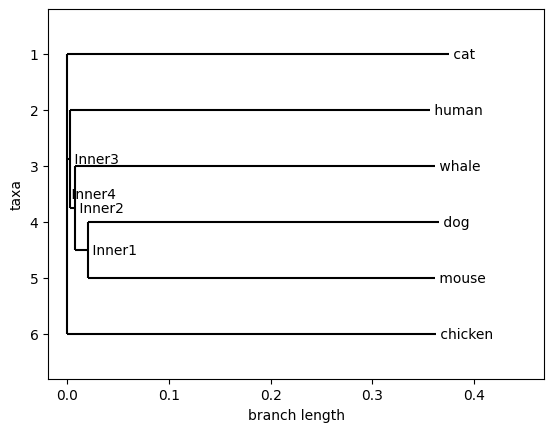

In [65]:
# Import matplotlib and create a basic tree
import matplotlib
import matplotlib.pyplot as plt
fig = Phylo.draw(species_tree)

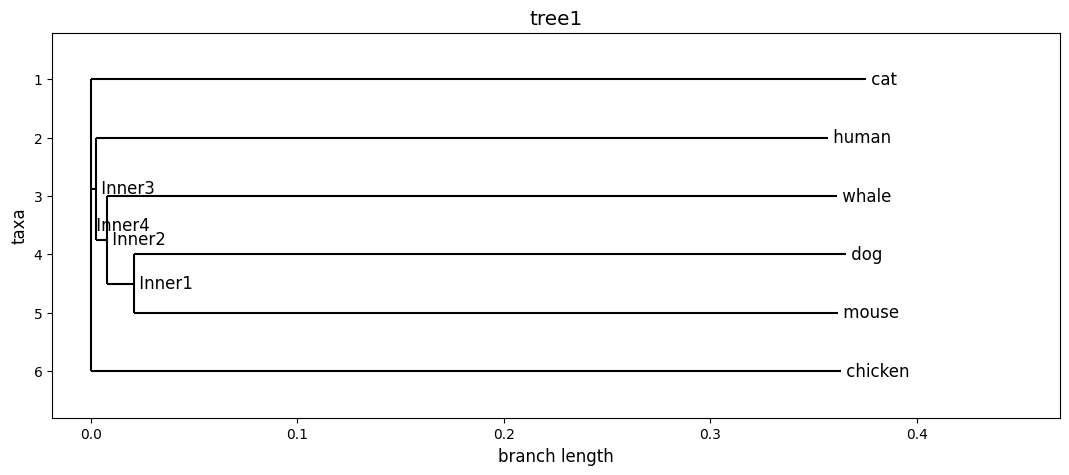

In [66]:
# Convert the tree to a different format (optional)
Phylo.convert(f"{root}/species_tree.xml", "phyloxml", "species_tree.nex", "nexus")
species_tree = Phylo.read("species_tree.nex", "nexus")

fig = plt.figure(figsize=(13, 5), dpi=100) # create figure & set the size
matplotlib.rc('font', size=12)              # fontsize of the leaf and node labels
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
#turtle_tree.ladderize()
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(species_tree, axes=axes)
fig.savefig(f"{root}/species_tree.pdf", backend='pdf')